In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Load test set

In [2]:
test = pd.read_csv('exercise_04_test.csv')
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.196063,3.683995,-3.265963,7.982156,-2.638979,-0.798760,-3.345929,1.266333,-9.689859,1.512794,...,71.588700,14.065825,-3.061930,asia,0.023357,6.021137,-2.423546,-1.182148,1.514047,3.775888
1,23.155197,-9.226725,6.179996,-29.612592,-11.146301,-11.858857,-3.588747,-0.928037,-9.924414,0.932668,...,22.600000,-13.743287,-3.408293,asia,1.349389,19.646176,13.871395,38.657216,5.395564,3.139697
2,-13.969618,-0.343978,1.920740,-1.983859,-18.619658,-4.929527,-0.669704,1.906140,-17.125858,1.112156,...,-141.012215,6.507336,8.900449,asia,2.149993,22.719042,-2.958959,-36.135939,5.520687,3.733732
3,49.722481,-1.500789,-1.564326,-8.113622,9.696716,-21.883567,-0.737723,4.043544,-11.514792,-1.797036,...,-35.285961,-2.009043,-2.427585,asia,-3.052037,-19.306807,-1.275701,-39.607665,1.185943,-2.072836
4,-13.494403,7.445215,-1.721518,49.111766,-14.566832,-8.327643,-1.031431,0.033500,20.977351,6.744525,...,17.486682,-4.412938,5.808763,asia,-0.100660,6.732681,4.303092,-42.697656,7.144178,2.820698


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
x0     9997 non-null float64
x1     9999 non-null float64
x2     9998 non-null float64
x3     9996 non-null float64
x4     10000 non-null float64
x5     10000 non-null float64
x6     9996 non-null float64
x7     9999 non-null float64
x8     9997 non-null float64
x9     9999 non-null float64
x10    9999 non-null float64
x11    9997 non-null float64
x12    10000 non-null float64
x13    9994 non-null float64
x14    9998 non-null float64
x15    9997 non-null float64
x16    9998 non-null float64
x17    9997 non-null float64
x18    9998 non-null float64
x19    9998 non-null float64
x20    9998 non-null float64
x21    10000 non-null float64
x22    10000 non-null float64
x23    9997 non-null float64
x24    9996 non-null float64
x25    9997 non-null float64
x26    9998 non-null float64
x27    9995 non-null float64
x28    9997 non-null float64
x29    9999 non-null float64
x30    10000 non

### Numerical variable with Missing values

In [4]:
num_var = test.select_dtypes('float').columns

In [5]:
# column names with NaN
fill_num_var = []
for i in num_var:
    if test[i].isna().sum()!=0:
        fill_num_var.append(i)
        
fill_num_var        

['x0',
 'x1',
 'x2',
 'x3',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x31',
 'x32',
 'x33',
 'x36',
 'x37',
 'x38',
 'x39',
 'x42',
 'x44',
 'x46',
 'x47',
 'x48',
 'x49',
 'x51',
 'x52',
 'x53',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x65',
 'x66',
 'x67',
 'x69',
 'x70',
 'x71',
 'x73',
 'x74',
 'x75',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99']

### Fill missing values

In [6]:
train = pd.read_csv('exercise_04_train.csv')
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-17.933519,6.559220,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,...,11.107047,0.093337,asia,0.421524,35.259947,8.994318,-21.000182,-0.686588,2.949106,1
1,-37.214754,10.774930,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,...,-1.991846,15.666187,asia,-0.132764,-1.192563,3.885024,-37.886523,-7.730392,-1.107330,0
2,0.330441,-19.609972,-1.331804,-15.153892,19.710240,19.077300,-1.747110,0.545570,-1.464609,3.670570,...,17.132840,-5.333012,asia,1.432308,-3.435427,-1.133450,7.426099,-5.945534,1.316312,0
3,-13.709765,-8.011390,-1.536483,23.129497,27.880879,20.573991,-1.617689,4.129694,1.139928,2.912838,...,12.292136,4.177925,asia,0.733069,4.372964,15.529931,29.712153,2.240740,0.477195,0
4,-4.202598,7.076210,8.881550,23.600777,26.232164,-14.462320,3.231193,-0.069364,-7.310536,-2.268700,...,6.218743,8.715709,asia,-0.977502,-30.085932,-8.244312,66.540331,-3.478195,-2.869702,1


In [7]:
for i in fill_num_var:
    test[i] = test[i].fillna(value = train[i])

### Categorical variables

#### 'x34'

In [8]:
test.x34.value_counts()

volkswagon    3132
Toyota        2773
bmw           1838
Honda         1277
tesla          545
chrystler      291
nissan          90
ford            39
mercades        11
chevrolet        3
Name: x34, dtype: int64

In [9]:
test.x34.isna().sum()

1

### 'x35'

In [10]:
test.x35.value_counts()

wed          3709
thurday      3337
wednesday    1489
thur         1097
tuesday       214
friday        130
monday         15
fri             7
Name: x35, dtype: int64

In [11]:
# replace wed, thur and fri
test.loc[test.x35=='thur','x35'] = 'thurday'
test.loc[test.x35=='wed','x35'] = 'wednesday'
test.loc[test.x35=='fri','x35'] = 'friday'
test.x35.unique()

array(['thurday', 'wednesday', 'tuesday', 'monday', 'friday', nan],
      dtype=object)

In [12]:
test.x35.value_counts()

wednesday    5198
thurday      4434
tuesday       214
friday        137
monday         15
Name: x35, dtype: int64

In [13]:
test.x35.isna().sum()

2

### 'x41'

In [14]:
# convert x41 into numerical variable by removing the dollar sign
test.x41 = test.x41.str.replace('$','').astype('float64')
test.x41.head()

0     124.72
1    1273.04
2   -1651.19
3     896.05
4   -1710.27
Name: x41, dtype: float64

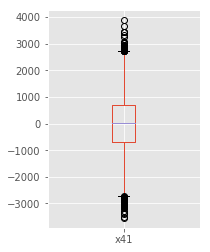

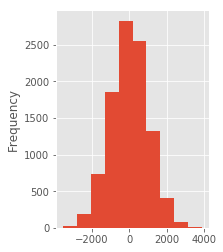

In [15]:
plt.subplot(121)
test.x41.plot.box()
plt.show()

plt.subplot(122)
test.x41.plot.hist()
plt.show()

In [16]:
test.x41.isna().sum()

0

### 'x45'

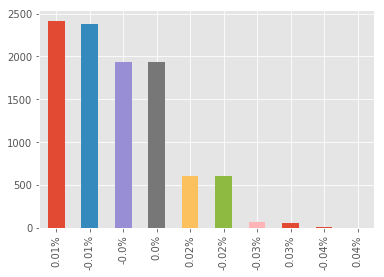

In [17]:
test.x45.value_counts().plot.bar()

In [18]:
test.x45.isna().sum()

2

### 'x68'

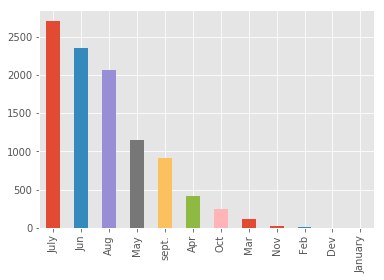

In [19]:
test.x68.value_counts().plot.bar()

In [20]:
test.x68.isna().sum()

0

### 'x93'

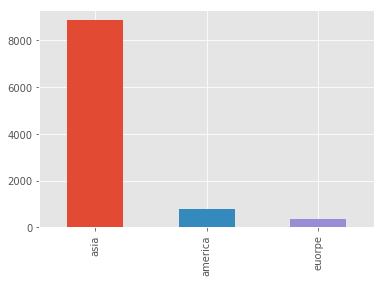

In [21]:
test.x93.value_counts().plot.bar()

In [22]:
test.x93.isna().sum()

1

### Dummy variables

In [23]:
df = pd.get_dummies(test,columns=['x34','x35','x45','x68','x93'],dummy_na=True)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x68_nan,x93_america,x93_asia,x93_euorpe,x93_nan
0,0.196063,3.683995,-3.265963,7.982156,-2.638979,-0.798760,-3.345929,1.266333,-9.689859,1.512794,...,0,0,0,0,0,0,0,1,0,0
1,23.155197,-9.226725,6.179996,-29.612592,-11.146301,-11.858857,-3.588747,-0.928037,-9.924414,0.932668,...,0,0,0,0,0,0,0,1,0,0
2,-13.969618,-0.343978,1.920740,-1.983859,-18.619658,-4.929527,-0.669704,1.906140,-17.125858,1.112156,...,0,0,0,0,0,0,0,1,0,0
3,49.722481,-1.500789,-1.564326,-8.113622,9.696716,-21.883567,-0.737723,4.043544,-11.514792,-1.797036,...,0,0,0,0,0,0,0,1,0,0
4,-13.494403,7.445215,-1.721518,49.111766,-14.566832,-8.327643,-1.031431,0.033500,20.977351,6.744525,...,0,1,0,0,0,0,0,1,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 140 entries, x0 to x93_nan
dtypes: float64(95), uint8(45)
memory usage: 7.7 MB


In [25]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x68_nan,x93_america,x93_asia,x93_euorpe,x93_nan
0,0.196063,3.683995,-3.265963,7.982156,-2.638979,-0.798760,-3.345929,1.266333,-9.689859,1.512794,...,0,0,0,0,0,0,0,1,0,0
1,23.155197,-9.226725,6.179996,-29.612592,-11.146301,-11.858857,-3.588747,-0.928037,-9.924414,0.932668,...,0,0,0,0,0,0,0,1,0,0
2,-13.969618,-0.343978,1.920740,-1.983859,-18.619658,-4.929527,-0.669704,1.906140,-17.125858,1.112156,...,0,0,0,0,0,0,0,1,0,0
3,49.722481,-1.500789,-1.564326,-8.113622,9.696716,-21.883567,-0.737723,4.043544,-11.514792,-1.797036,...,0,0,0,0,0,0,0,1,0,0
4,-13.494403,7.445215,-1.721518,49.111766,-14.566832,-8.327643,-1.031431,0.033500,20.977351,6.744525,...,0,1,0,0,0,0,0,1,0,0


In [26]:
# save test_set for prediction
df.to_csv('test_set.csv',index=False)